In [2]:
!pip install networkx powerlaw

# **Import required libraries**

In [3]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')

# Create a random graph using the Erdos-Renyi model.
# 400 is the number of nodes.
# 0.05 is the probability of an edge between any two nodes.

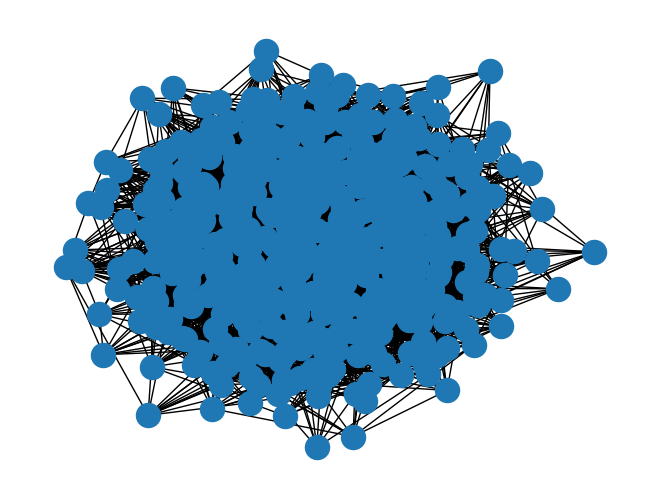

In [4]:
er = nx.erdos_renyi_graph(400, 0.05)
nx.draw(er)

# Calculate the degree histogram of the graph.
# 'hist' will be a list where hist[i] is the number of nodes with degree i.
# Plot the degree distribution.
# x-axis: degree values (from 0 up to the maximum degree).
# y-axis: number of nodes with that degree.

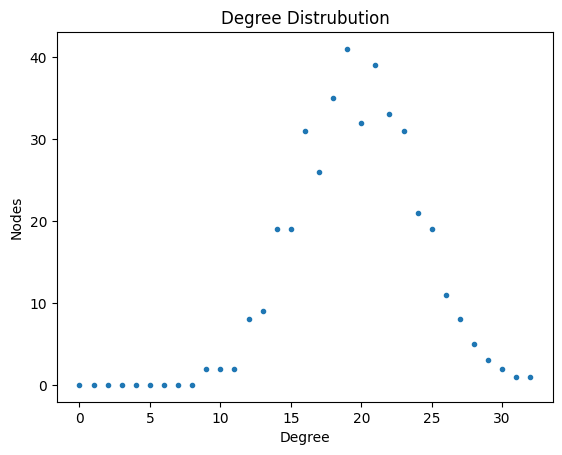

In [5]:
hist = nx.degree_histogram(er)
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distrubution")
plt.xlabel("Degree")
plt.ylabel("Nodes")
plt.show()

# Create an Erdos-Renyi random graph.
# 100 nodes in the graph.
# 0.005 probability of an edge between any two nodes.  This is a low probability

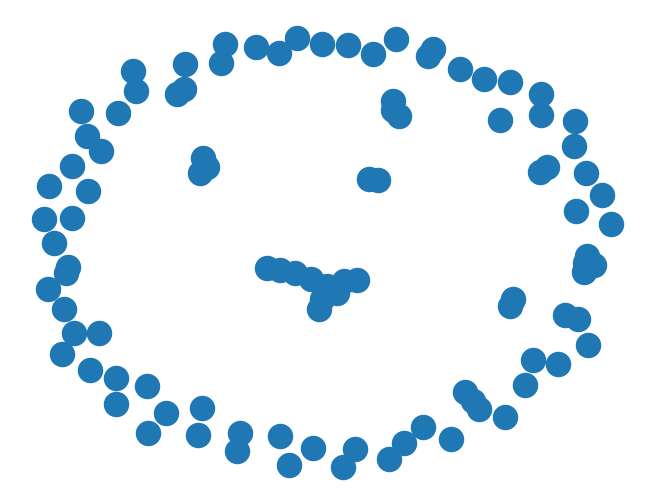

In [6]:
er = nx.erdos_renyi_graph(100, 0.005)
nx.draw(er)

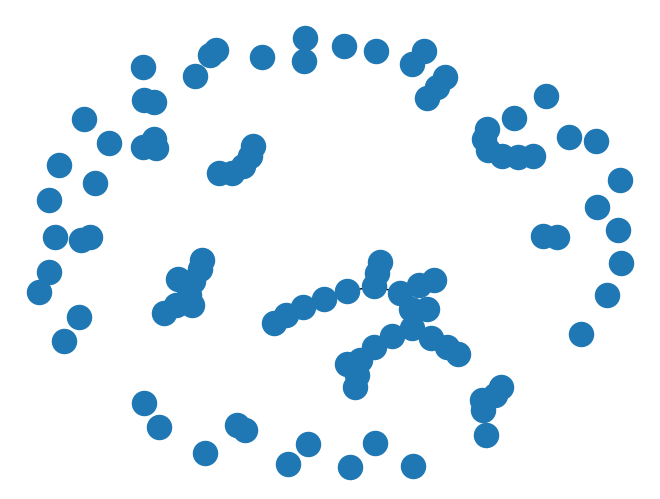

In [7]:
er = nx.erdos_renyi_graph(100, 0.01)
nx.draw(er)

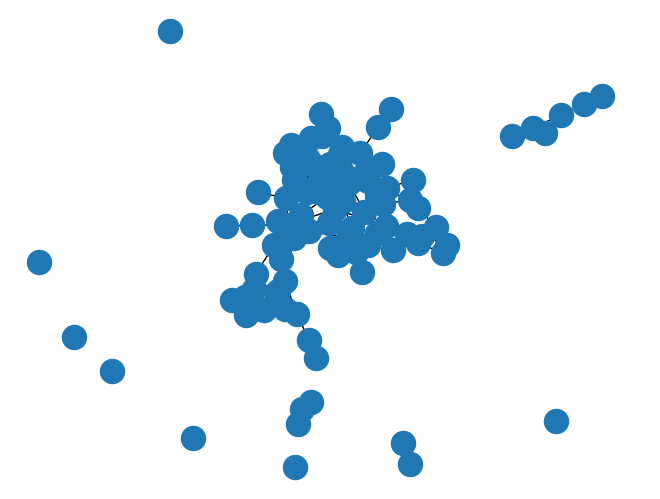

In [8]:
er = nx.erdos_renyi_graph(100, 0.02)
nx.draw(er)

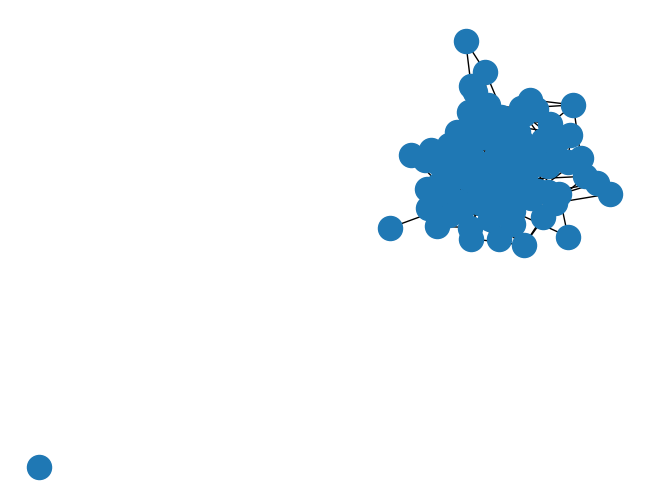

In [9]:
er = nx.erdos_renyi_graph(100, 0.06)
nx.draw(er)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read a graph from an edge list file.
# The file is located at "/content/drive/MyDrive/niigem/network.csv".
# The edges are separated by commas (delimiter=",") in the file.
# The node IDs are integers (nodetype=int).

In [11]:
g = nx.read_edgelist("/content/drive/MyDrive/niigem/network.csv", delimiter=",", nodetype=int)



Table View of Graph Properties:
| Vertex | Degree | Neighbors | Incident Edges |
| :----- | :----- | :-------- | :--------------- |
| A      | 2      | B, C      | ('A', 'B'), ('A', 'C')   |
| B      | 2      | A, C      | ('B', 'A'), ('B', 'C')   |
| C      | 3      | A, B, D      | ('C', 'A'), ('C', 'B'), ('C', 'D')   |
| D      | 1      | C      | ('D', 'C')   |


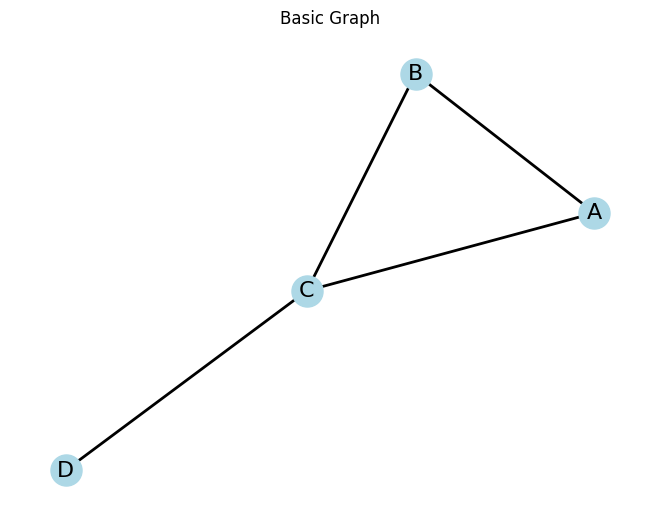

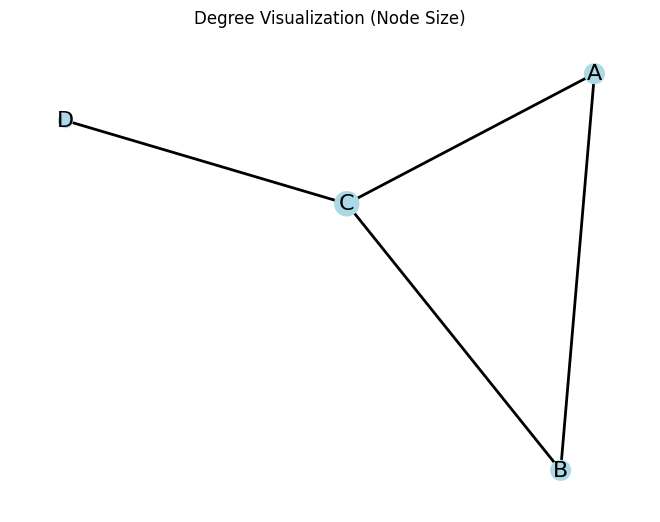

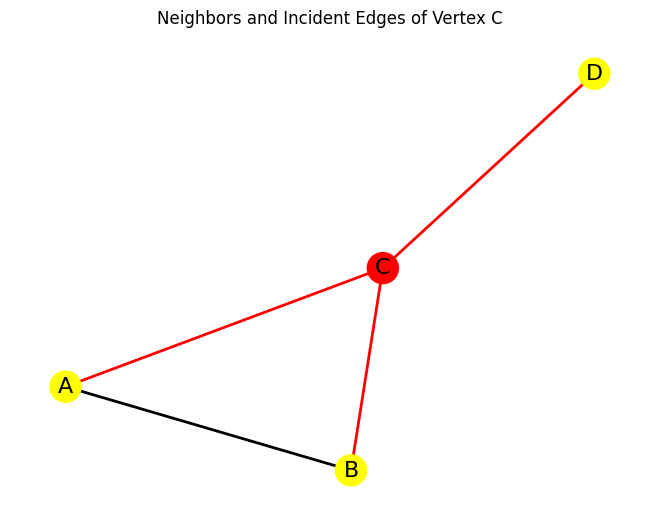

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D'])
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D')])

plt.figure(1)
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=16, width=2)
plt.title("Basic Graph")


plt.figure(2)
degree = dict(G.degree())
nx.draw(G, with_labels=True, node_color='lightblue', node_size=[v * 100 for v in degree.values()],
        font_size=16, width=2)
plt.title("Degree Visualization (Node Size)")

plt.figure(3)
node_colors = ['lightblue'] * len(G.nodes)
edge_colors = ['black'] * len(G.edges)

neighbors_of_C = list(nx.neighbors(G, 'C'))
incident_edges_of_C = list(G.edges('C'))

node_indices = list(G.nodes).index('C')
neighbor_indices = [list(G.nodes).index(n) for n in neighbors_of_C]

edge_indices_incident_to_C = []
all_edges_list = list(G.edges)
for incident_edge in incident_edges_of_C:
    found_index = -1
    for index, edge in enumerate(all_edges_list):
        if (incident_edge[0] == edge[0] and incident_edge[1] == edge[1]) or \
           (incident_edge[0] == edge[1] and incident_edge[1] == edge[0]):
            found_index = index
            break
    if found_index != -1:
        edge_indices_incident_to_C.append(found_index)


node_colors[node_indices] = 'red'
for index in neighbor_indices:
    node_colors[index] = 'yellow'
for index in edge_indices_incident_to_C:
    edge_colors[index] = 'red'


nx.draw(G, with_labels=True, node_color=node_colors, edge_color=edge_colors,
        node_size=500, font_size=16, width=2)
plt.title("Neighbors and Incident Edges of Vertex C")

print("\nTable View of Graph Properties:")
print("| Vertex | Degree | Neighbors | Incident Edges |")
print("| :----- | :----- | :-------- | :--------------- |")
for vertex in G.nodes():
    neighbors_str = ", ".join(list(nx.neighbors(G, vertex)))
    incident_edges_str = ", ".join([str(e) for e in G.edges(vertex)])
    print(f"| {vertex}      | {G.degree(vertex)}      | {neighbors_str}      | {incident_edges_str}   |")


plt.show()

# **Bonus problem**

In [14]:
graph = {
    'v0': {'v1': 2, 'v2': 1, 'v3': 4, 'v4': 5},
    'v1': {'v0': 2, 'v2': 3},
    'v2': {'v0': 1, 'v1': 3, 'v5': 1},
    'v3': {'v0': 4, 'v6': 4},
    'v4': {'v0': 5, 'v5': 2, 'v7': 4},
    'v5': {'v2': 1, 'v4': 2, 'v6': 6, 'v7': 5},
    'v6': {'v3': 4, 'v5': 6, 'v7': 3},
    'v7': {'v4': 4, 'v5': 5, 'v6': 3}
}

node_values = {
    'v2': (0, 3),
    'v3': (0, 1),
    'v5': (2, 4),
    'v4': (0, 6),
    'v6': (3, 5),
    'v7': (6, 7),
    'v0': (2, 5),
    'v1': (2, 5)
}

print("Эцсийн оройн утгууд:")
for node, value in node_values.items():
    print(f"{node}: {value}")

Эцсийн оройн утгууд:
v2: (0, 3)
v3: (0, 1)
v5: (2, 4)
v4: (0, 6)
v6: (3, 5)
v7: (6, 7)
v0: (2, 5)
v1: (2, 5)
